<a href="https://colab.research.google.com/github/Sujith2k/An-Aid-for-the-Blind/blob/master/ML/Primary_model/detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls

gdrive	sample_data


In [0]:
%cd gdrive

/content/gdrive


In [0]:
import cv2
import numpy as np
import glob
import random
from google.colab.patches import cv2_imshow

In [0]:
net = cv2.dnn.readNet("My Drive/yolov3/yolov3_training_last.weights", "My Drive/yolov3/yolov3_training.cfg")

# Name custom object
classes = ['Person','Billboard','Bus','Traffic sign','Truck','Currency']



In [0]:
# Images path
images_path = glob.glob(r"My Drive/yolov3/test/*")
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Insert here the path of your images
random.shuffle(images_path)

In [0]:
len(images_path)

8

Truck
[[0]]


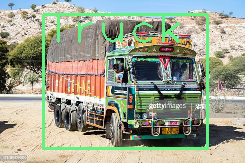

Currency
[[0]]


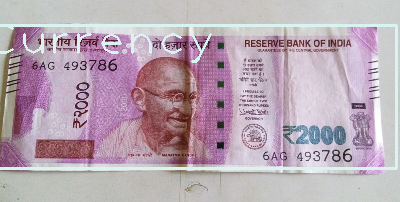

()


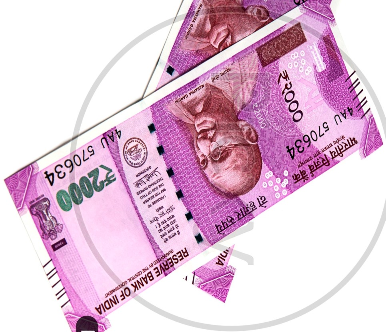

Truck
Truck
[[0]
 [1]]


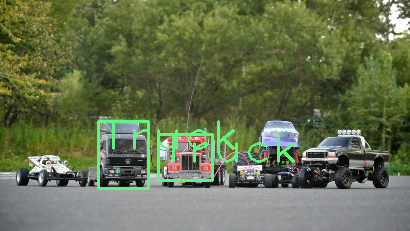

Currency
[[0]]


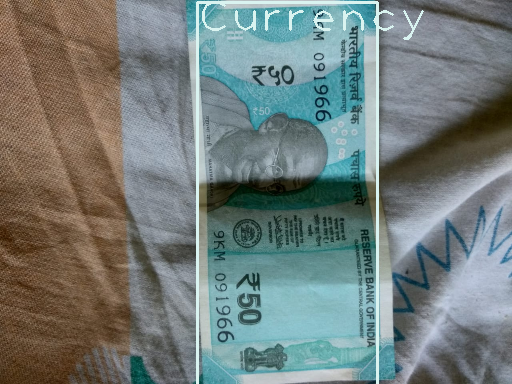

Currency
[[0]]


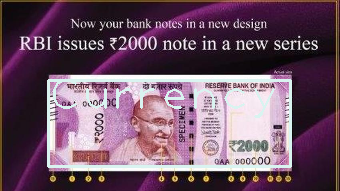

Truck
Traffic sign
Truck
Truck
Truck
Person
Person
Person
[[3]
 [1]
 [4]
 [0]
 [7]
 [5]
 [6]]


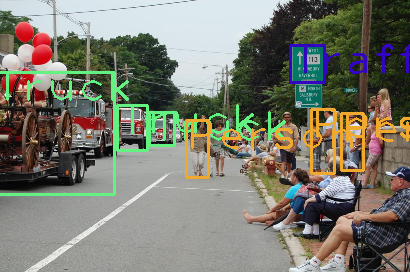

()


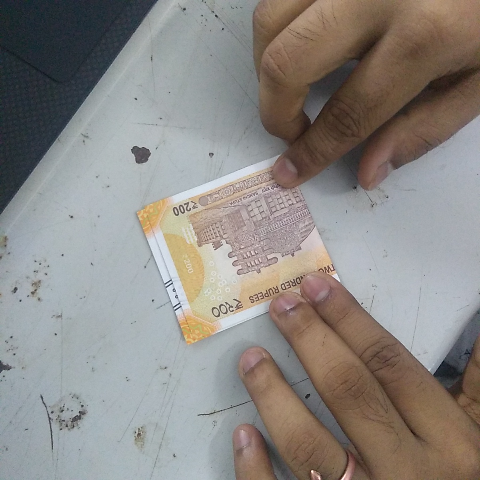

In [0]:
# Loading image
for img_path in images_path:
  img = cv2.imread(img_path)
  img = cv2.resize(img, None, fx=0.4, fy=0.4)
  height, width, channels = img.shape
  
  # Detecting objects
  blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
  
  net.setInput(blob)
  outs = net.forward(output_layers)
  
  # Showing informations on the screen
  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
      for detection in out:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]
          if confidence > 0.3:
              # Object detected
              print(classes[class_id])
              center_x = int(detection[0] * width)
              center_y = int(detection[1] * height)
              w = int(detection[2] * width)
              h = int(detection[3] * height)
  
              # Rectangle coordinates
              x = int(center_x - w / 2)
              y = int(center_y - h / 2)
  
              boxes.append([x, y, w, h])
              confidences.append(float(confidence))
              class_ids.append(class_id)
  
  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.3, 0.3)
  print(indexes)
  font = cv2.FONT_HERSHEY_PLAIN
  for i in range(len(boxes)):
      if i in indexes:
          x, y, w, h = boxes[i]
          label = str(classes[class_ids[i]])
          color = colors[class_ids[i]]
          cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
          cv2.putText(img, label, (x, y + 30), font, 3, color, 2)
  
  
  cv2_imshow(img)
  key = cv2.waitKey(0)
  